In [38]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sewar import full_ref
from skimage import measure, metrics
from PIL import Image
from skimage.metrics import structural_similarity as ssim

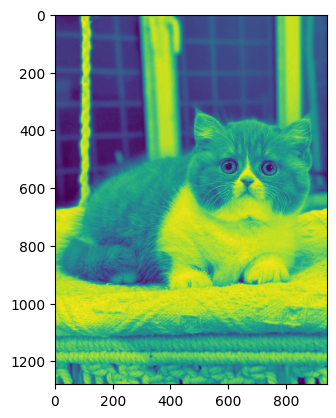

In [39]:
img_original = cv.imread('british-shorthair.jpg', 0)
plt.imshow(img_original)

In [40]:
pixel_original = np.array([img_original])
pixel_original

array([[[ 36,  36,  36, ...,  62,  62,  62],
        [ 36,  36,  36, ...,  62,  62,  62],
        [ 35,  35,  35, ...,  62,  62,  62],
        ...,
        [174, 175, 178, ..., 202, 192, 186],
        [183, 183, 182, ..., 200, 190, 184],
        [193, 192, 188, ..., 197, 187, 181]]], dtype=uint8)

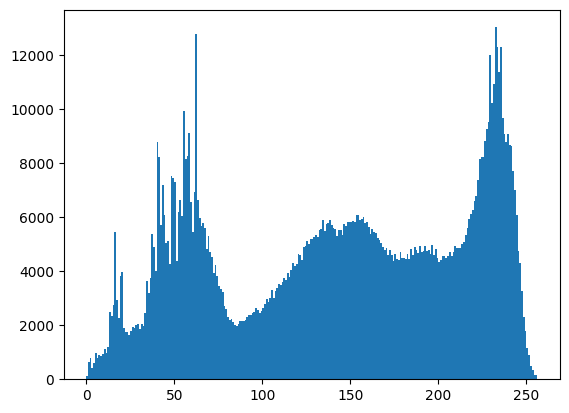

In [41]:
plt.hist(pixel_original.ravel(),256, [0,256])
plt.show()

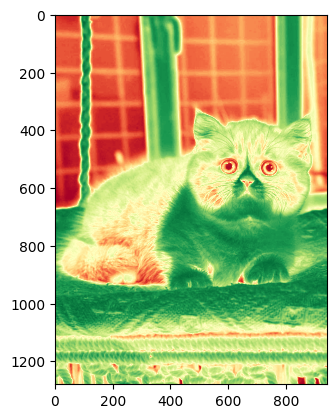

In [42]:
img_1 =img_original
plt.imshow(img_1, cmap = 'RdYlGn')

In [43]:
def show(img_original):
    plt.imshow(img_1, cmap = 'gray')
    plt.xticks([])
    plt.yticks([])

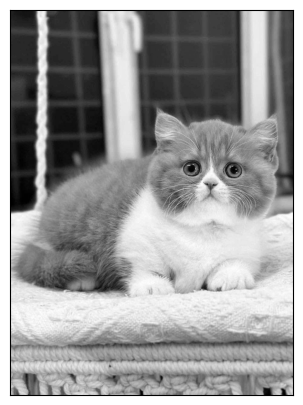

In [44]:
h, w = img_original.shape
img = np.zeros((h + 160, w), np.uint8)
img[80:-80:] = img_original
plt.figure(figsize = (15,5))
plt.subplot(131)
show(img)

In [45]:
pixel_gray = np.array([img])
pixel_gray

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

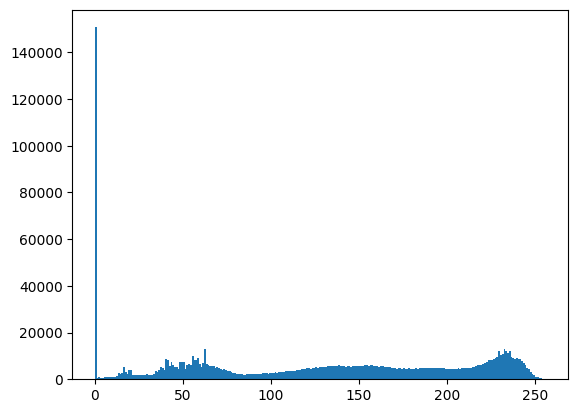

In [46]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

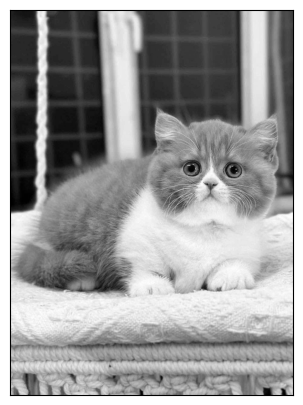

In [47]:
mean_kernel = np.ones((3,3), np.float32)/25
conv_mean = cv.filter2D(img, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
plt.figure(figsize=(5,5))
show(conv_mean)

In [48]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print(f'RMSE: based on scikit image: {rmse_skimg}')

RMSE: based on scikit image: 0.6411267003499916


In [49]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print(f'MSE: based on scikit image: {mse_skimg}')

MSE: based on scikit image: 9308.396093104262


In [50]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print(f'PSNR: based on scikit image: {psnr_skimg}')

PSNR: based on scikit image: 8.442055056570096


In [51]:
ssim_skimg = ssim(img, conv_mean, data_range = img.max() - img.min(), multichannel=True)
print(f'SSIM: based on scikit image: {ssim_skimg}')

SSIM: based on scikit image: 0.5599096868339135
